In [36]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [37]:
!ls

power_depletion_intensity_2023_11_15.csv  power_ionization_intensity_2023_11_02.csv  sample_data


### Two Photon Fit

In [38]:
def two_photon(N_0,b,phi):
    return N_0*(1-np.exp(-b*phi**2))

def two_photon_residual(P,phi,t):
    N_0, b = P
    sim = two_photon(N_0,b,phi)
    return t - sim

In [39]:
#phi = np.array([17,21,27,32,38,44,59,65,79,97,110,135,175,205])
#target = np.array([0.001887, 0.002131, 0.002756, 0.003821,0.010859,0.016902,0.024392,0.024019,0.027897,0.034165,0.030601,0.032474,0.031312,0.031248])np.loadtxt('power_depletion_intensity_2023_11_15.csv')
ionization_exp_container = np.loadtxt('power_ionization_intensity_2023_11_02.csv',delimiter=',')
phi = ionization_exp_container[:,0]
target = ionization_exp_container[:,1]
P_0 = [1,0]
fit_container = least_squares(two_photon_residual,P_0,args=(phi,target))

In [40]:
fit_container.x

array([0.03256377, 0.00030852])

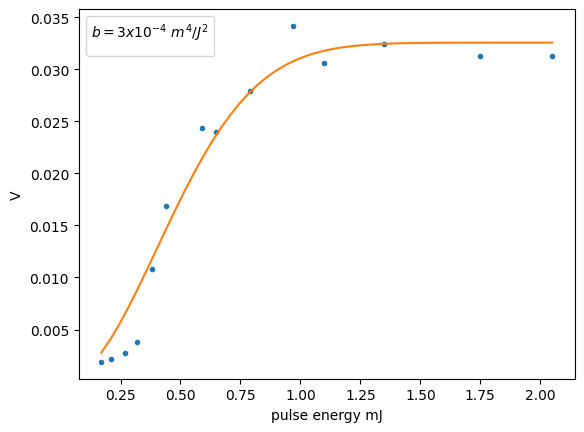

In [41]:
plt.plot(phi/100,target,'.')
l = np.linspace(phi[0],phi[-1])
plt.plot(l/100,two_photon(fit_container.x[0],fit_container.x[1],l))
plt.xlabel('pulse energy mJ')
plt.ylabel('V')
plt.legend(title='$b=3x10^{-4} \ m^4/J^2$')

In [42]:
#target=target - 0.002
#phi = phi[:9]

In [43]:
fits_container=[]
P_0 = [0.035,1e-5]
for i in range(50):
    phi_i = np.random.normal(0,.02,len(phi))*phi + phi
    target_i = np.random.normal(0,.09,len(target))*target + target
    fits_container.append(least_squares(two_photon_residual,P_0,args=(phi_i,target_i)).x)

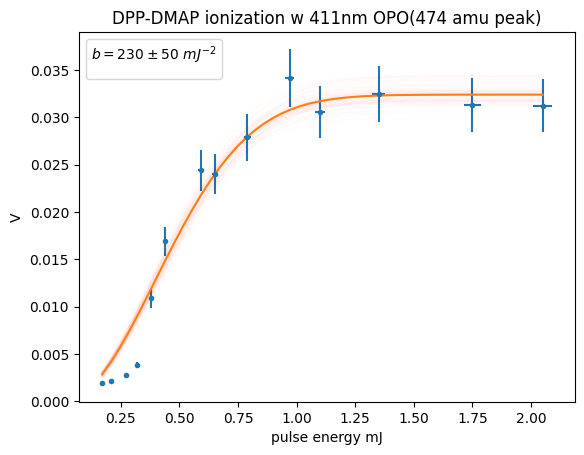

In [44]:
plt.errorbar(phi/100,target,xerr=phi/100*.02,yerr=np.abs(target)*.09,marker='.',linestyle='')
l = np.linspace(phi[0],phi[-1])
for i in range(len(fits_container)):
    plt.plot(l/100,two_photon(fits_container[i][0],fits_container[i][1],l),'r',alpha=.01)
plt.xlabel('pulse energy mJ')
plt.ylabel('V')
plt.legend(title='$b=230  \pm 50 \ mJ^{-2}$')
plt.title('DPP-DMAP ionization w 411nm OPO(474 amu peak)')
plt.plot(l/100,two_photon(np.mean(fits_container,axis=0)[0],np.mean(fits_container,axis=0)[1],l))

In [45]:
np.mean(fits_container,axis=0)

array([0.03240434, 0.00031838])

In [46]:
np.std(fits_container,axis=0)

array([1.02616403e-03, 2.34326037e-05])

### Single Phonton Fit

In [47]:
def single_photon(N_0,b,phi):
    return N_0*(1-np.exp(-b*phi))

def single_photon_residual(P,phi,t):
    N_0, b = P
    sim = single_photon(N_0,b,phi)
    return t - sim

In [48]:
#phi = np.array([1.9,3.3,4.3,6,8,10.5,13.5,17.2,21,23.5,31.5,41,68.5,95,149,155,163,171])
#target = np.array([0.055309,0.0621,0.0635,0.06285,0.05988,0.06771,0.0702,0.07044,0.0682,0.07082,0.0728,0.0792,0.0771,0.07961,0.0896,0.0926,0.101,0.1003])
depletion_exp_container = np.loadtxt('power_depletion_intensity_2023_11_15.csv',delimiter=',')
phi = depletion_exp_container[:,0]
target = depletion_exp_container[:,1]
P_0 = [1,0]
fit_container = least_squares(single_photon_residual,P_0,args=(phi,target))

In [49]:
fit_container.x

array([0.07870261, 0.42323318])

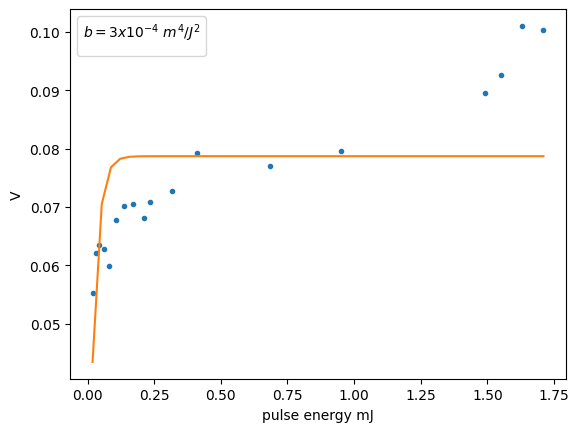

In [50]:
plt.plot(phi/100,target,'.')
l = np.linspace(phi[0],phi[-1])
plt.plot(l/100,single_photon(fit_container.x[0],fit_container.x[1],l))
plt.xlabel('pulse energy mJ')
plt.ylabel('V')
plt.legend(title='$b=3x10^{-4} \ m^4/J^2$')

In [51]:
target=target[:14]
phi = phi[:14]

In [52]:
fits_container=[]
P_0 = [1,0]
for i in range(50):
    phi_i = np.random.normal(0,.02,len(phi))*phi + phi
    target_i = np.random.normal(0,.09,len(target))*target + target
    fits_container.append(least_squares(single_photon_residual,P_0,args=(phi_i,target_i)).x)

$N = N_0(1 - e^{-b\phi})$

Text(0.5, 1.0, 'DPP-TRP Depletion w 411nm OPO(474 amu peak)')

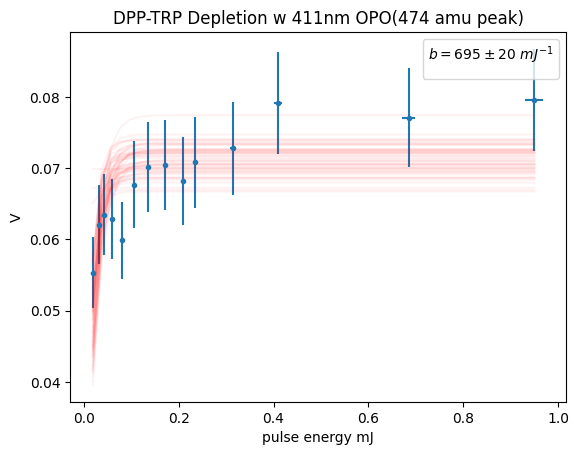

In [53]:
plt.errorbar(phi/100,target,xerr=phi/100*.02,yerr=target*.09,marker='.',linestyle='')
l = np.linspace(phi[0],phi[-1])
for i in range(len(fits_container)):
    plt.plot(l/100,single_photon(fits_container[i][0],fits_container[i][1],l),'r',alpha=.05)
plt.xlabel('pulse energy mJ')
plt.ylabel('V')
plt.legend(title='$b=695  \pm 20 \ mJ^{-1}$')
plt.title('DPP-TRP Depletion w 411nm OPO(474 amu peak)')

In [54]:
np.mean(fits_container,axis=0)

array([0.0711907 , 1.03858928])

In [55]:
np.std(fits_container,axis=0)

array([0.00216   , 1.87345155])

In [56]:
def three_photon(offset,N_0,b,phi):
    return offset + N_0*(1-np.exp(-b*phi**3))

def three_photon_residual(P,phi,t):
    offset, N_0, b = P
    sim = three_photon(offset,N_0,b,phi)
    return t - sim

In [57]:
phi = np.array([17,21,27,32,38,44,59,65,79,97,110,135,175,205])
target = np.array([0.001887, 0.002131, 0.002756, 0.003821,0.010859,0.016902,0.024392,0.024019,0.027897,0.034165,0.030601,0.032474,0.031312,0.031248])

P_0 = [0.002,0.035,1e-4]
fit_container = least_squares(three_photon_residual,P_0,args=(phi,target))

<ipython-input-56-64e709e46267>:2: RuntimeWarning: overflow encountered in exp
  return offset + N_0*(1-np.exp(-b*phi**3))


In [58]:
fit_container.x

array([7.08474517e-05, 3.13380633e-02, 6.78272233e-06])

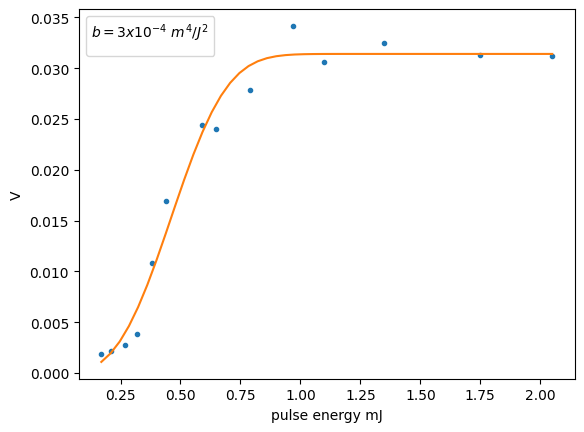

In [59]:
plt.plot(phi/100,target,'.')
l = np.linspace(phi[0],phi[-1])
plt.plot(l/100,three_photon(fit_container.x[0],fit_container.x[1],fit_container.x[2],l))
plt.xlabel('pulse energy mJ')
plt.ylabel('V')
plt.legend(title='$b=3x10^{-4} \ m^4/J^2$')

In [60]:
#target=target - 0.002
#phi = phi[:9]

In [61]:
fits_container=[]
P_0 = [0.002,.035,1e-5]
for i in range(50):
    phi_i = np.random.normal(0,.02,len(phi))*phi + phi
    target_i = np.random.normal(0,.09,len(target))*target + target
    fits_container.append(least_squares(three_photon_residual,P_0,args=(phi_i,target_i)).x)

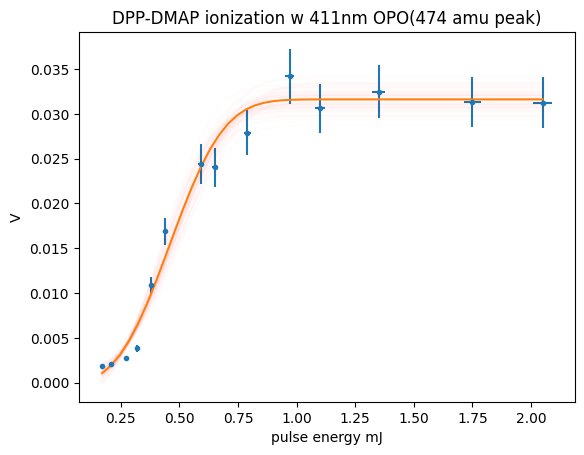

In [62]:
plt.errorbar(phi/100,target,xerr=phi/100*.02,yerr=np.abs(target)*.09,marker='.',linestyle='')
l = np.linspace(phi[0],phi[-1])
for i in range(len(fits_container)):
    plt.plot(l/100,three_photon(fits_container[i][0],fits_container[i][1],fits_container[i][2],l),'r',alpha=.01)
plt.xlabel('pulse energy mJ')
plt.ylabel('V')
#plt.legend(title='$b=230  \pm 50 \ mJ^{-2}$')
plt.title('DPP-DMAP ionization w 411nm OPO(474 amu peak)')
plt.plot(l/100,three_photon(np.mean(fits_container,axis=0)[0],np.mean(fits_container,axis=0)[1],np.mean(fits_container,axis=0)[2],l))

In [63]:
np.mean(fits_container,axis=0), np.std(fits_container,axis=0)

(array([1.08967646e-05, 3.16013452e-02, 6.91934122e-06]),
 array([7.68196453e-04, 1.25328640e-03, 1.22171373e-06]))

### N Photon fit
The idea is basically to build a Harness to then search for the best photon fit in order up to 5 or 6.


In [64]:
.5,.5**8,.5**16,

(0.5, 0.00390625, 1.52587890625e-05)

In [65]:
def N_photon_fit_harness(N,x,p_0,target):
  N_fit_container = []
  for n in range(N):
    p = [p_0[0],p_0[1]**((n+1))]
    fit_n = nth_fit(n+1,x,p,target)
    N_fit_container.append(fit_n)

  N_photon_plot(x,target,N_fit_container)

def nth_fit(n,x,p_n,target):
  n_photon = lambda p_i,x:  p_i[0]*(1-np.exp(-p_i[1]*x**n))
  n_photon_residual = lambda p_i,x,t: t - n_photon(p_i,x)

  fits_container=[]
  for i in range(30):
    phi_i = np.random.normal(0,.02,len(x))*x + x
    target_i = np.random.normal(0,.09,len(target))*target + target
    #print(fits_container)
    fits_container.append(least_squares(n_photon_residual,p_n,args=(phi_i,target_i)).x)
  return np.mean(fits_container,axis=0), np.std(fits_container,axis=0)

def N_photon_plot(x,target,N_fit_container):
  plt.figure(figsize=(35,8))
  plt.suptitle('DPP-DMAP ionization w 411nm OPO(474 amu peak)',fontsize=30)
  l = np.linspace(x[0],x[-1])
  n=0
  for fit in N_fit_container:
    n = n+1
    n_photon = lambda p_i,x: p_i[0]*(1-np.exp(-p_i[1]*x**n))
    plt.subplot(1,len(N_fit_container),n)
    plt.errorbar(x/100,target,xerr=x/100*.02,yerr=np.abs(target)*.09,marker='.',linestyle='')
    plt.plot(l/100,n_photon(fit[0],l),'r')
    plt.xlabel('pulse energy mJ')
    plt.ylabel('V')
    plt.legend(title='$b=%5.3e  \pm %5.3e \ mJ^{-%s}$'%(fit[0][1],fit[1][1],str(n)))
    plt.title(str(n)+'-photon process')

<ipython-input-65-334e92a5f2b1>:11: RuntimeWarning: overflow encountered in exp
  n_photon = lambda p_i,x:  p_i[0]*(1-np.exp(-p_i[1]*x**n))


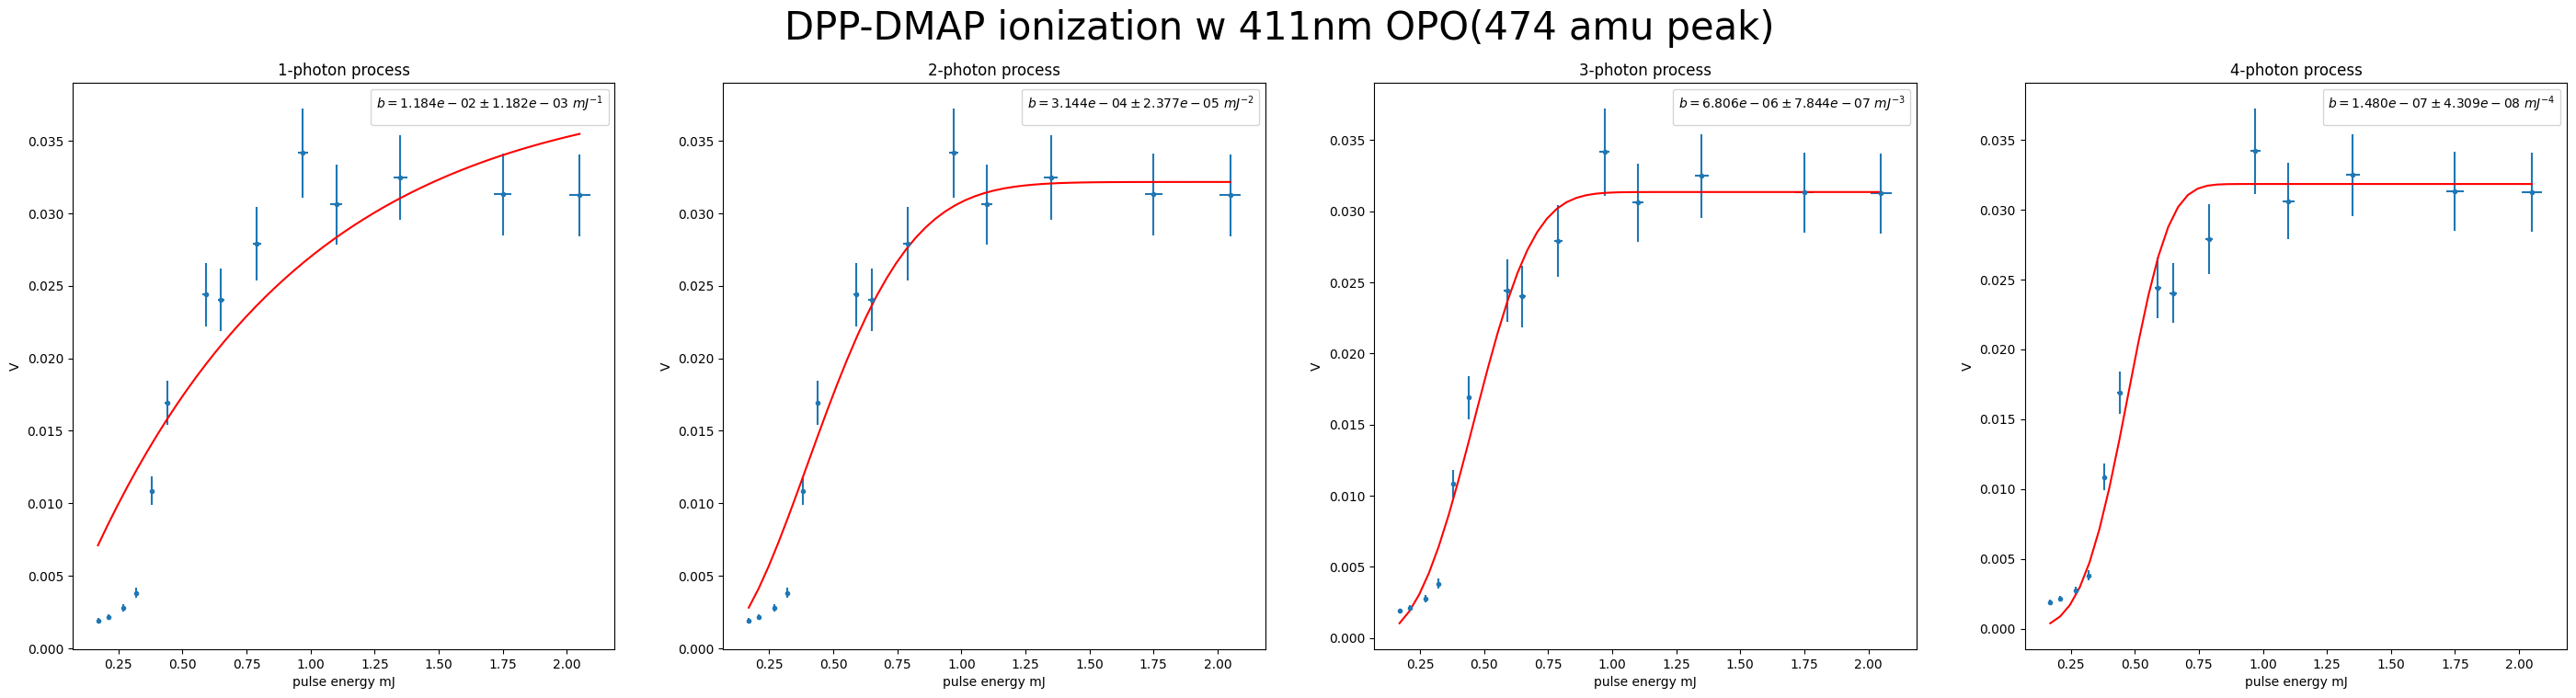

In [67]:
ionization_exp_container = np.loadtxt('power_ionization_intensity_2023_11_02.csv',delimiter=',')
phi = ionization_exp_container[:,0]
target = ionization_exp_container[:,1]
N_photon_fit_harness(4,phi,[0.035,.1],target)

The begining of the curve is really what is most important in distinguishing the one or two photon process.  Certainly more data would be required to subset things appropriately, but it definately appears to be of higher order than a single photon process.  Another thought is that it could somehow be a combination of two different orders, i.e. single and double.  